# 간경화에 관한 EDA

### 변수 설명
- ID                 : 환자 ID
- N_Days             : 등록 시작 시점부터 censored 까지 기간
- Status             : 
- Drug               : 약물 처리군 / 플라시보 군
- Age                : 연령
- Sex                : 성별
- Ascites            : Y/N 배에 복수가 찼는지
- Hepatomegaly       : Y/N 간 비대칭이 생겼는지
- Spiders            : Y/N 거미혈관증 유무 주로 여성에게 많이 발생할 수 있음 ( 에스트로겐과 관련 )
- Edema              : Y/N 부종 유무
- Bilirubin          : 적혈구 파괴 수치 (파괴 수치가 높을수록 간염이 존재할 확률이 높음)
- Cholesterol        : 콜레스테롤 상승시 지방간이 생김 ( 높을수록 간에 안좋음 )
- Albumin            : 단백질의 한 종류 (값이 하락할 수록 간 기능이 안좋음)
- Copper             : 신체의 필수 미네랄 하나 (단백질, 효소) 수치가 높을 수록 대사 장애 발생 가능성 높음
- Alk_Phos           : (alp) 수치가 높으면 간의 문제가 있을 가능성 높음
- SGOT               : (AST) 간기능 검사의 주요 요소 [0, 40]이 정상 범위
- Tryglicerides      : 중성지방 150 미만이 정상.
- Platelets          : 혈소판 수치가 떨어질 수록 간 경변이 발생 가능
- Prothrombin        : 혈액이 얼마나 빨리 굳는지 측정 시간 ( 시간이 증가하면 응고 시간이 늘어나기 때문에 간경변 의심할 수 있음, 높을수록 의심)
- Stage              : 간경변의 4단계 1부터 4까지의 순서

In [168]:
# load modules
# basic
import numpy as np
import pandas as pd
from tqdm import tqdm
import itertools

## graph
import matplotlib.pyplot as plt
import seaborn as sns

## sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [151]:
# load data
data = pd.read_csv('../data/cirrhosis.csv', encoding='utf-8')

In [152]:
# 데이터 결측치 현황
data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [153]:
data['Status'].unique()

array(['D', 'C', 'CL'], dtype=object)

In [154]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [155]:
data.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [160]:
# 연속형 변수간의 상관관계 확인
data_numerical_corr = data[list(data.dtypes[data.dtypes != 'object'].index[1:])].corr()

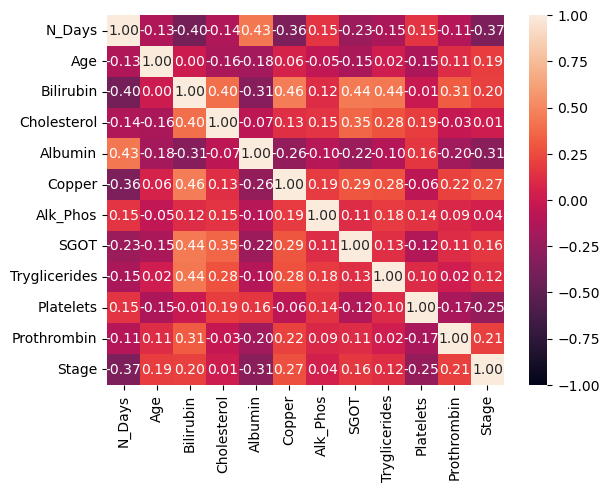

In [161]:
# 상관관계를 기반으로 히트맵 그래프 작성.
sns.heatmap(data_numerical_corr, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

In [99]:
# 범주형 변수만 가져오기
data_categorical = data[list(data.dtypes[data.dtypes == 'object'].index[1:])]

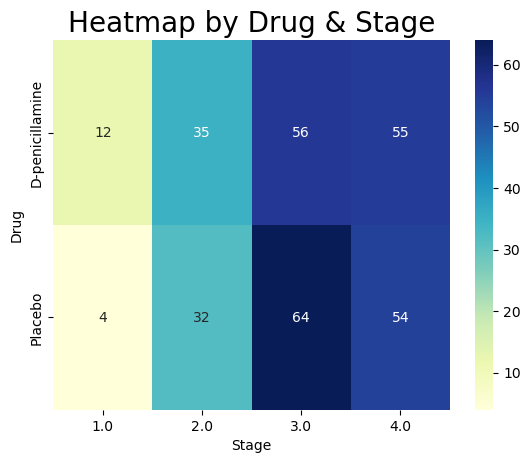

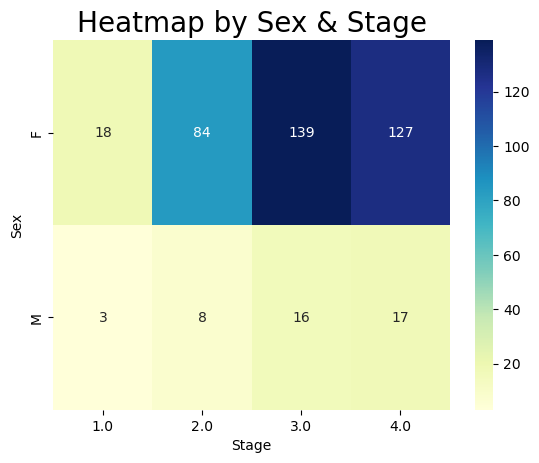

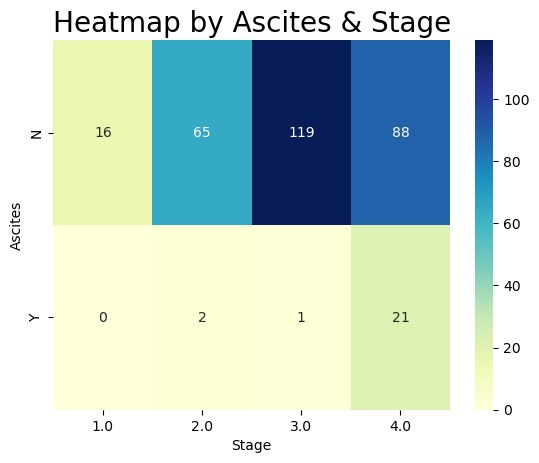

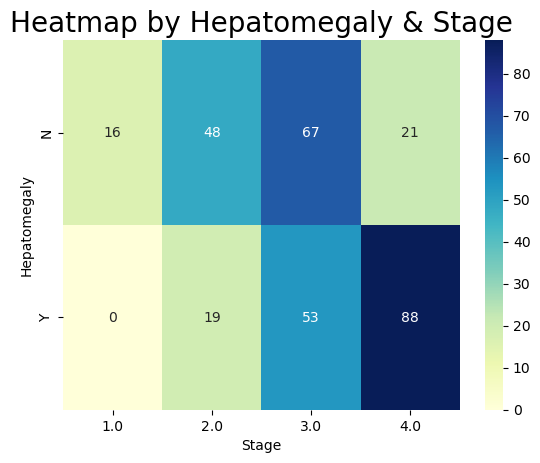

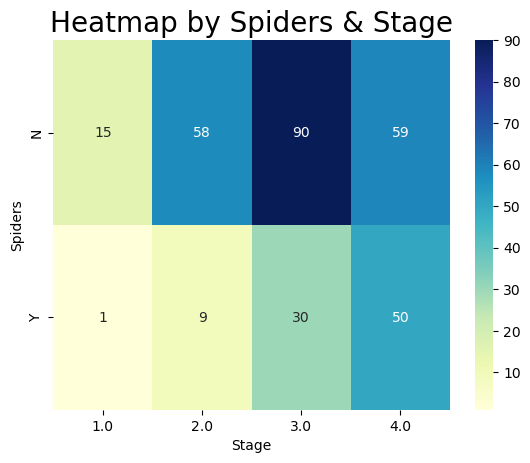

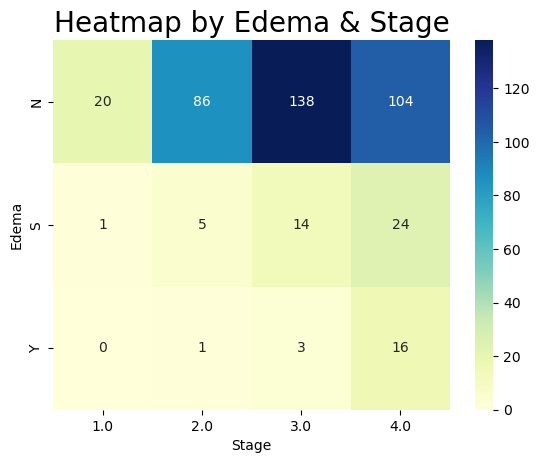

In [163]:
# confusion matrix
for name in data_categorical.columns:
    a = pd.crosstab(data_categorical[name], data['Stage'])
    sns.heatmap(a, annot=True, cmap = 'YlGnBu', fmt = 'g')
    plt.title(f'Heatmap by {name} & Stage', fontsize=20)
    plt.show()

In [165]:
data['Alk_Phos']
data['Status']

0       D
1       C
2       D
3       D
4      CL
       ..
413     D
414     C
415     C
416     C
417     C
Name: Status, Length: 418, dtype: object

In [173]:
data['Stage'].value_counts() / data['Stage'].count()

Stage
3.0    0.376214
4.0    0.349515
2.0    0.223301
1.0    0.050971
Name: count, dtype: float64

In [174]:
data['Sex'].value_counts() / data['Sex'].count()

Sex
F    0.894737
M    0.105263
Name: count, dtype: float64

In [177]:
drug_data = data[~data['Drug'].isna()]
drug_data['Sex'].value_counts() / drug_data['Sex'].count()

Sex
F    0.884615
M    0.115385
Name: count, dtype: float64